# Explore data

In [9]:
import pandas as pd
from icecream import ic

In [10]:
df = pd.read_csv("b117_data_SA.csv").rename(columns={"b117": "wider", "mettef":"b117"})
df = df.sort_values(by='created_at').reset_index(drop=True)
ic(len(df))
df.head()

ic| len(df): 88727


,created_at,id,text,b117,wider,neg,neu,pos,compound
0,2020-04-15 15:59:00,1.250454e+18,"Er det bare mig, eller minder denne engelske #...",[],['engelsk'],0.000,0.947,0.053,0.0857
1,2020-04-15 16:16:53,1.250458e+18,@minkonto @denaegteemil Det kalder lidt på at ...,[],['mink'],0.000,1.000,0.000,0.0000
2,2020-04-15 16:19:15,1.250459e+18,@minkonto @denaegteemil Ketchup - altså det rø...,[],['mink'],0.000,0.789,0.211,0.6523
3,2020-04-15 16:29:52,1.250461e+18,@minkonto @kjellerupbiz @denaegteemil Glimrend...,[],['mink'],0.206,0.706,0.088,-0.4588
4,2020-04-15 16:34:20,1.250462e+18,@minkonto @kjellerupbiz @denaegteemil Gå i de ...,[],['mink'],0.077,0.813,0.110,0.2790


In [11]:
# Choose date range from 1.st of Dec
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')
mask = (df['date'] > '2020-11-30') & (df['date'] <= '2021-2-20')
df = df.loc[mask]

## Remove quote tweets

In [12]:
import re
def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet)
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    return clean_tweet

In [13]:
df["mentioneless_text"] = df.apply(lambda row: remove_mentions(row), axis = 1)
df["text50"] = df["mentioneless_text"].str[0:50]

In [14]:
df["dupe50"] = df["text50"].duplicated(keep = "first")

In [15]:
ic(len(df[df["dupe50"] == True]))

ic| len(df[df["dupe50"] == True]): 643


643

In [16]:
df = df[df["dupe50"] == False].reset_index()

## Which combination of keywords resulted with highest counts of matches

In [17]:
# Narrow search
df.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,wider,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50
0,"['b117', 'britiske corona']",2,2,2,2,2,2,2,2,2,2,2,2,2
1,"['b117', 'britiske virus']",2,2,2,2,2,2,2,2,2,2,2,2,2
2,"['b117', 'engelsk variant']",1,1,1,1,1,1,1,1,1,1,1,1,1
3,['b117'],495,495,495,495,495,495,495,495,495,495,495,495,495
4,['britisk corona'],14,14,14,14,14,14,14,14,14,14,14,14,14
5,['britisk virus'],2,2,2,2,2,2,2,2,2,2,2,2,2
6,['britiske corona'],16,16,16,16,16,16,16,16,16,16,16,16,16
7,['britiske virus'],10,10,10,10,10,10,10,10,10,10,10,10,10
8,['engelsk corona'],9,9,9,9,9,9,9,9,9,9,9,9,9
9,['engelsk mutation'],14,14,14,14,14,14,14,14,14,14,14,14,14


In [18]:
# Wide search
df.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,b117,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50
0,['britiske'],605,605,605,605,605,605,605,605,605,605,605,605,605
1,"['engelsk', 'britiske']",6,6,6,6,6,6,6,6,6,6,6,6,6
2,"['engelsk', 'england']",39,39,39,39,39,39,39,39,39,39,39,39,39
3,"['engelsk', 'mink', 'mutation']",9,9,9,9,9,9,9,9,9,9,9,9,9
4,"['engelsk', 'mink']",7,7,7,7,7,7,7,7,7,7,7,7,7
5,"['engelsk', 'mutation', 'britiske']",1,1,1,1,1,1,1,1,1,1,1,1,1
6,"['engelsk', 'mutation', 'england']",3,3,3,3,3,3,3,3,3,3,3,3,3
7,"['engelsk', 'mutation']",92,92,92,92,92,92,92,92,92,92,92,92,92
8,['engelsk'],2722,2722,2722,2722,2722,2722,2722,2722,2722,2722,2722,2722,2722
9,"['england', 'britiske']",7,7,7,7,7,7,7,7,7,7,7,7,7


## Check whether different keywords return meaningful Covid tweets

In [19]:
m = df[df["wider"] == "['engelsk', 'mink']"]

In [20]:
#for i in m["text"][0:5]:
#    print(i)
#    print("\n")

In [21]:
#engelsk = df[df["wider"] == "['engelsk']"]
#for i in engelsk["text"][0:5]:
#    print(i)

"muation" is fine but "engelsk" is mostly actually just English.

## Remove the rows where it's just ['engelsk'] and the combinations where mutation is explained by 'mink'
Make a dataframe for the tweets where english and mink overlap

In [22]:
ic(len(df))
rmv_list = ["['engelsk', 'mink', 'mutation']",
            "['engelsk']",
            "['england']",
            "['mink', 'mutation']",
            "['mink']",
            "['mutant', 'mink', 'mutation']",
            "['mutant', 'mink']",
           "['britiske']",
           "['engelsk', 'britiske']",
           "['engelsk', 'england']",
           "['engelsk', 'mink']",
           "['engelsk', 'mink']",
           "['engelsk', 'mink']",
            "['mink', 'britiske']",
            "['mink', 'england']",
            "['mink', 'mutation', 'britiske']",
            "['mink', 'mutation', 'england']",
            "['mutant', 'engelsk', 'mink', 'mutation']",
            "['mutant', 'mink', 'england']",
           "['england', 'britiske']"]
clean_df = df[~df.wider.isin(rmv_list)].reset_index(drop=True)

include_list = ["['engelsk', 'mink']",
                "['mink', 'britiske']",
                "['mink', 'england']",
                "['mink', 'mutation', 'britiske']",
                "['mink', 'mutation', 'england']",
                "['mutant', 'engelsk', 'mink', 'mutation']",
                "['mutant', 'mink', 'england']"]

overlap_df = df[df.wider.isin(include_list)]
ic(len(clean_df))
ic(len(overlap_df))

ic| len(df): 17855
ic| len(clean_df): 1801
ic| len(overlap_df): 48


48

## Extra step: remove mentions of Cluster 5
Cluster 5 also refers to minks

In [67]:
def extract_cluster5(row):
    tweet = row["text"].lower()
    test_list = ["cluster 5", "cluster5"] 
    res = [ele for ele in test_list if(ele in tweet)] 

    return res

In [79]:
clean_df["cluster5"] = clean_df.apply(lambda row: extract_cluster5(row), axis = 1)
clean_df["cluster5"] = clean_df["cluster5"].astype(str)

In [84]:
clean_df = clean_df[clean_df["cluster5"] == "[]"].drop("cluster5", axis=1).reset_index(drop=True)

In [85]:
# Narrow search - check again
clean_df.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,wider,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave
0,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,['b117'],446,446,446,446,446,446,446,446,446,446,446,446,446,445
2,['britisk corona'],13,13,13,13,13,13,13,13,13,13,13,13,13,13
3,['britisk virus'],2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,['britiske corona'],6,6,6,6,6,6,6,6,6,6,6,6,6,6
5,['britiske virus'],1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,['engelsk corona'],5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,['engelsk mutation'],14,14,14,14,14,14,14,14,14,14,14,14,14,14
8,[],1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1289


In [86]:
clean_df.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,b117,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave
0,"['engelsk', 'mutation', 'britiske']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['engelsk', 'mutation', 'england']",3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,"['engelsk', 'mutation']",92,92,92,92,92,92,92,92,92,92,92,92,92,92
3,"['mutant', 'britiske']",5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,"['mutant', 'engelsk']",7,7,7,7,7,7,7,7,7,7,7,7,7,7
5,"['mutant', 'england']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,"['mutant', 'mutation']",3,3,3,3,3,3,3,3,3,3,3,3,3,3
7,['mutant'],85,85,85,85,85,85,85,85,85,85,85,85,85,85
8,"['mutation', 'britiske']",94,94,94,94,94,94,94,94,94,94,94,94,94,94
9,"['mutation', 'england', 'britiske']",1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Visualize

In [87]:
# Aggregate a frequency DF
def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['date']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_tweets = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    return freq_tweets

In [88]:
# Create a column which is just date
clean_df["date"] = pd.to_datetime(clean_df["created_at"], utc=True).dt.strftime('%Y-%m-%d')

freq_df = get_tweet_frequencies(clean_df)
freq_df.head()

,index,created_at,id,text,b117,wider,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave,nr_of_tweets
0,55466,2020-12-01 16:02:29,1.333804e+18,@Westegnen Jo flere nye mutationer desto størr...,[],['mutation'],0.273,0.727,0.000,-0.9130,2020-12-01,Jo flere nye mutationer desto større risiko f...,Jo flere nye mutationer desto større risiko f...,False,NaN,2
1,55511,2020-12-01 18:05:43,1.333835e+18,@marie_bjerre @dkpolparrot Måske fordi ingen h...,[],['mutation'],0.030,0.923,0.047,0.1901,2020-12-01,Måske fordi ingen havde interesse i at en mu...,Måske fordi ingen havde interesse i at en mu...,False,NaN,2
2,55879,2020-12-02 13:33:21,1.334129e+18,Er ret spændende undersøgelse af sars-covid-19...,[],['mutation'],0.244,0.587,0.169,-0.6194,2020-12-02,Er ret spændende undersøgelse af sars-covid-19...,Er ret spændende undersøgelse af sars-covid-19...,False,0.050800,5
3,55888,2020-12-02 13:54:43,1.334134e+18,@MetteKjaer7 @MaguaSif @UffeMerrild @FCKHansi ...,[],['mutation'],0.053,0.837,0.110,0.4342,2020-12-02,Er det DET man kalder mutation? Så giver ...,Er det DET man kalder mutation? Så giver ...,False,0.171986,5
4,55974,2020-12-02 18:05:00,1.334197e+18,"@pelledragsted Nogen finder måske, at smitten ...",[],['mutation'],0.000,1.000,0.000,0.0000,2020-12-02,"Nogen finder måske, at smitten fra Enhedslist...","Nogen finder måske, at smitten fra Enhedslist...",False,0.086029,5


In [89]:
freq_df.nr_of_tweets.describe()

count    1781.000000
mean       79.760247
std        44.051965
min         2.000000
25%        50.000000
50%        79.000000
75%       107.000000
max       166.000000
Name: nr_of_tweets, dtype: float64

In [90]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt

In [91]:
freq_df["date"] = pd.to_datetime(freq_df["date"])
freq_df['date_ordinal'] = pd.to_datetime(freq_df['date']).apply(lambda date: date.toordinal())


# Add dates to the plot
20th/21st of December 2020 - Danmark announces 48h flight ban from UK active 21/12-23/12 10 am https://www.trm.dk/nyheder/2020/danmark-lukker-luftrummet-for-britisk-indflyvning/

23rd of December – Flight ban from UK extended until 24th https://www.trm.dk/nyheder/2020/flyveforbud-forlaenges-til-og-med-24-december/

5th of January 2021 - Press-conference, highest alert level, new 5m distancing rules https://www.thelocal.dk/20210105/latest-denmark-moves-to-highest-covid-19-alert-level-amid-concerns-over-b117-variant

13th of January 2021 - New press-conference, extending lockdown until 7th of February (media mentions both UK and South Africa covid mutations)  https://www.kristeligt-dagblad.dk/danmark/sundhedsministeriet-indkalder-til-pressemode; https://www.berlingske.dk/politik/mette-frederiksen-aabner-op-for-at-forlaenge-restriktioner-yderligere

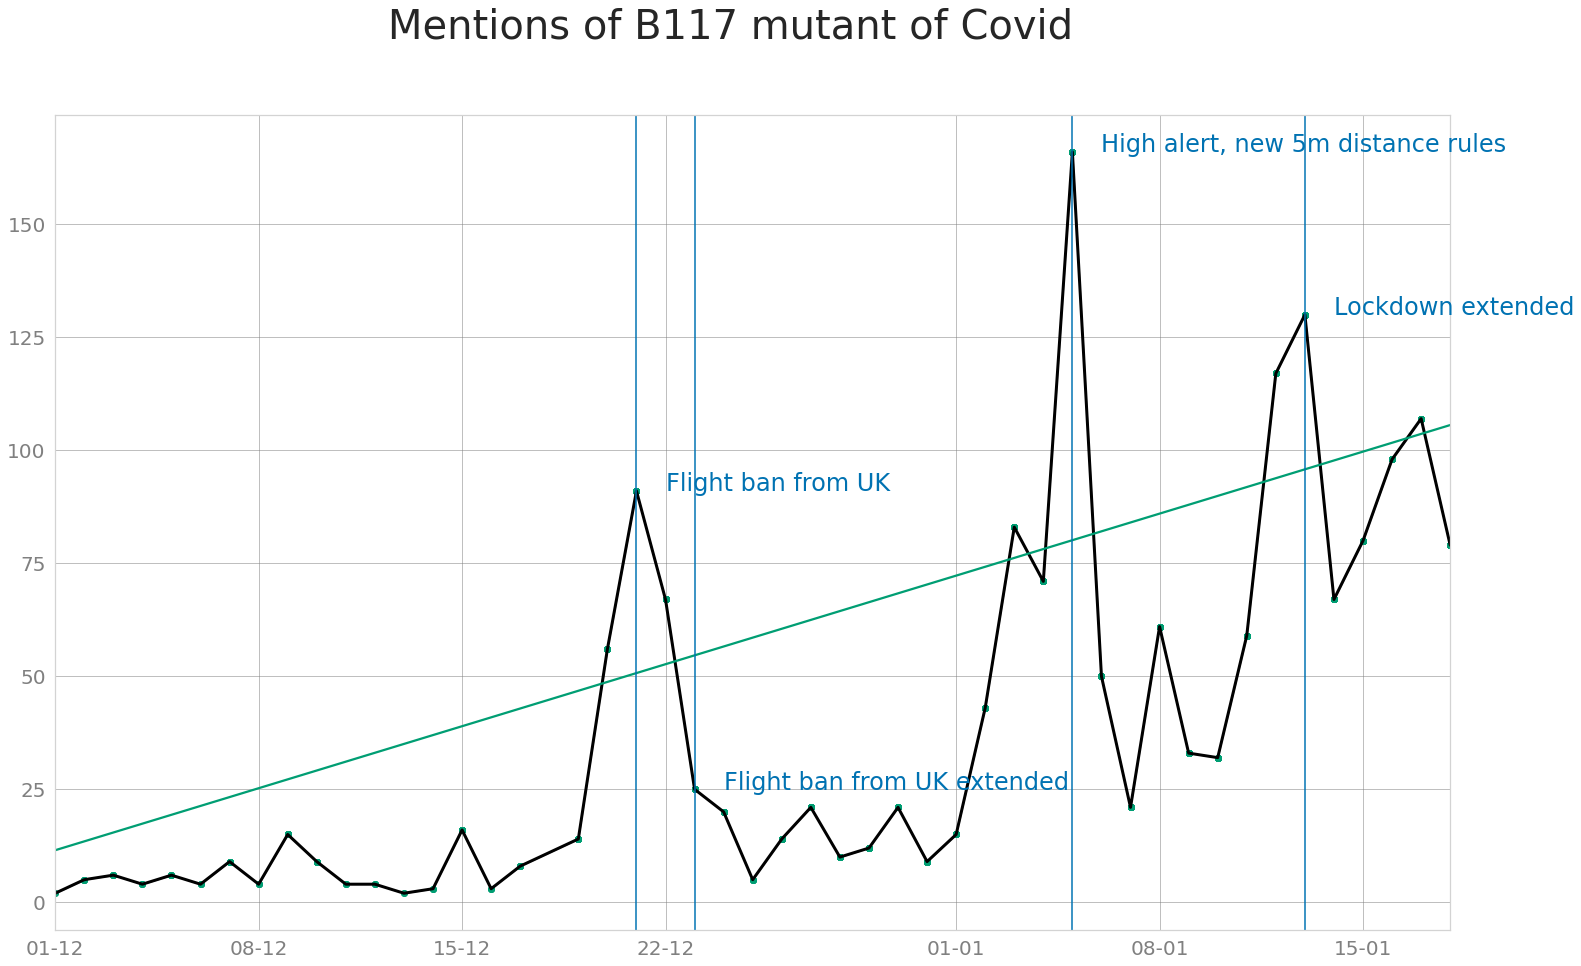

In [92]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  palette = palette[0], 
                     linewidth = 3, data = freq_df)
ax1 = sns.regplot(
    data=freq_df,
    x='date_ordinal',
    y='nr_of_tweets',
    color = palette[3],
    ci=False
    #y_jitter=.5
)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

plt.axvline(dt.datetime(2020, 12, 21), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 22), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_df[freq_df["date"] == "2020-12-21"]["nr_of_tweets"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK', # data label
 color = palette[5])

plt.axvline(dt.datetime(2020, 12, 23), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 24), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_df[freq_df["date"] == "2020-12-23"]["nr_of_tweets"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK extended', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 5), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 6), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_df[freq_df["date"] == "2021-01-05"]["nr_of_tweets"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'High alert, new 5m distance rules', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 13), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 14), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_df[freq_df["date"] == "2021-01-13"]["nr_of_tweets"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Lockdown extended', # data label
 color = palette[5])

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Mentions of B117 mutant of Covid", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/all_mutations_mentions.png"
fig.savefig(plot_name)

fig.show()

In [93]:
freq_df["nr_of_tweets"].describe()

count    1781.000000
mean       79.760247
std        44.051965
min         2.000000
25%        50.000000
50%        79.000000
75%       107.000000
max       166.000000
Name: nr_of_tweets, dtype: float64

## December discourse vs January discourse

In [94]:
# January and December data
jan = freq_df[pd.to_datetime(freq_df['date']).dt.month == 1].reset_index(drop=True)
dec = freq_df[pd.to_datetime(freq_df['date']).dt.month == 12].reset_index(drop=True)

print("January   ",len(jan))
print("December  ",len(dec))

January    1312
December   469


In [95]:
ic(jan.describe())
ic(dec.describe())

ic| jan.describe():               index            id          neg          neu          pos  \
                    count   1312.000000  1.312000e+03  1312.000000  1312.000000  1312.000000   
                    mean   70838.536585  1.348445e+18     0.055240     0.854424     0.090322   
                    std     1909.929527  1.860143e+15     0.072809     0.102728     0.082175   
                    min    67398.000000  1.344932e+18     0.000000     0.311000     0.000000   
                    25%    68922.500000  1.346489e+18     0.000000     0.783000     0.000000   
                    50%    71207.500000  1.348967e+18     0.028000     0.858000     0.078000   
                    75%    72660.750000  1.350080e+18     0.090250     0.933000     0.138000   
                    max    73706.000000  1.351314e+18     0.689000     1.000000     0.385000   
                    
                              compound  compound_7day_ave  nr_of_tweets   date_ordinal  
                    count 

,index,id,neg,neu,pos,compound,compound_7day_ave,nr_of_tweets,date_ordinal
count,469.000000,4.690000e+02,469.000000,469.000000,469.000000,469.000000,467.000000,469.000000,469.000000
mean,64060.799574,1.340698e+18,0.060667,0.842070,0.097264,0.067956,0.064033,41.503198,737779.091684
std,2583.238997,2.415428e+15,0.075603,0.106733,0.092954,0.448384,0.189175,32.148668,6.654646
min,55466.000000,1.333804e+18,0.000000,0.481000,0.000000,-0.936400,-0.442843,2.000000,737760.000000
25%,63990.000000,1.340432e+18,0.000000,0.783000,0.000000,-0.181100,-0.075121,14.000000,737778.000000
50%,64758.000000,1.341050e+18,0.031000,0.843000,0.082000,0.020700,0.055686,25.000000,737780.000000
75%,65466.000000,1.341790e+18,0.105000,0.918000,0.155000,0.423800,0.212507,67.000000,737782.000000
max,67314.000000,1.344662e+18,0.338000,1.000000,0.519000,0.917900,0.492486,91.000000,737790.000000


In [96]:
jan.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,wider,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave,nr_of_tweets,date_ordinal
0,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,['b117'],434,434,434,434,434,434,434,434,434,434,434,434,434,433,434,434
2,['britisk corona'],8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,['britiske corona'],4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,['engelsk mutation'],13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
5,[],852,852,852,852,852,852,852,852,852,852,852,852,852,850,852,852


In [97]:
dec.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,wider,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave,nr_of_tweets,date_ordinal
0,['b117'],12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1,['britisk corona'],5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2,['britisk virus'],2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,['britiske corona'],2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,['britiske virus'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,['engelsk corona'],5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
6,['engelsk mutation'],1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,[],441,441,441,441,441,441,441,441,441,441,441,441,441,439,441,441


In [98]:
jan.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,b117,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave,nr_of_tweets,date_ordinal
0,"['engelsk', 'mutation', 'britiske']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['engelsk', 'mutation', 'england']",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,"['engelsk', 'mutation']",73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73
3,"['mutant', 'britiske']",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,"['mutant', 'engelsk']",7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
5,"['mutant', 'mutation']",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,['mutant'],52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
7,"['mutation', 'britiske']",86,86,86,86,86,86,86,86,86,86,86,86,86,86,86,86
8,"['mutation', 'england', 'britiske']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,"['mutation', 'england']",13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [99]:
dec.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,b117,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,compound_7day_ave,nr_of_tweets,date_ordinal
0,"['engelsk', 'mutation', 'england']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['engelsk', 'mutation']",19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
2,"['mutant', 'britiske']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"['mutant', 'england']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,['mutant'],33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
5,"['mutation', 'britiske']",8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
6,"['mutation', 'england']",19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
7,['mutation'],370,370,370,370,370,370,370,370,370,370,370,370,370,368,370,370
8,[],17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


# B117 mentions over time

In [100]:
def extract_b117(row):
    tweet = row["text"].lower()
    test_list = ['b117'] 
    res = [ele for ele in test_list if(ele in tweet)] 

    return res

freq_df["b117"] = freq_df.apply(lambda row: extract_b117(row), axis = 1)
freq_df["b117"] = freq_df["b117"].astype(str)
b117 = freq_df[freq_df["b117"] == "['b117']"].reset_index(drop=True)

In [101]:
freq_b117 = get_tweet_frequencies(b117)

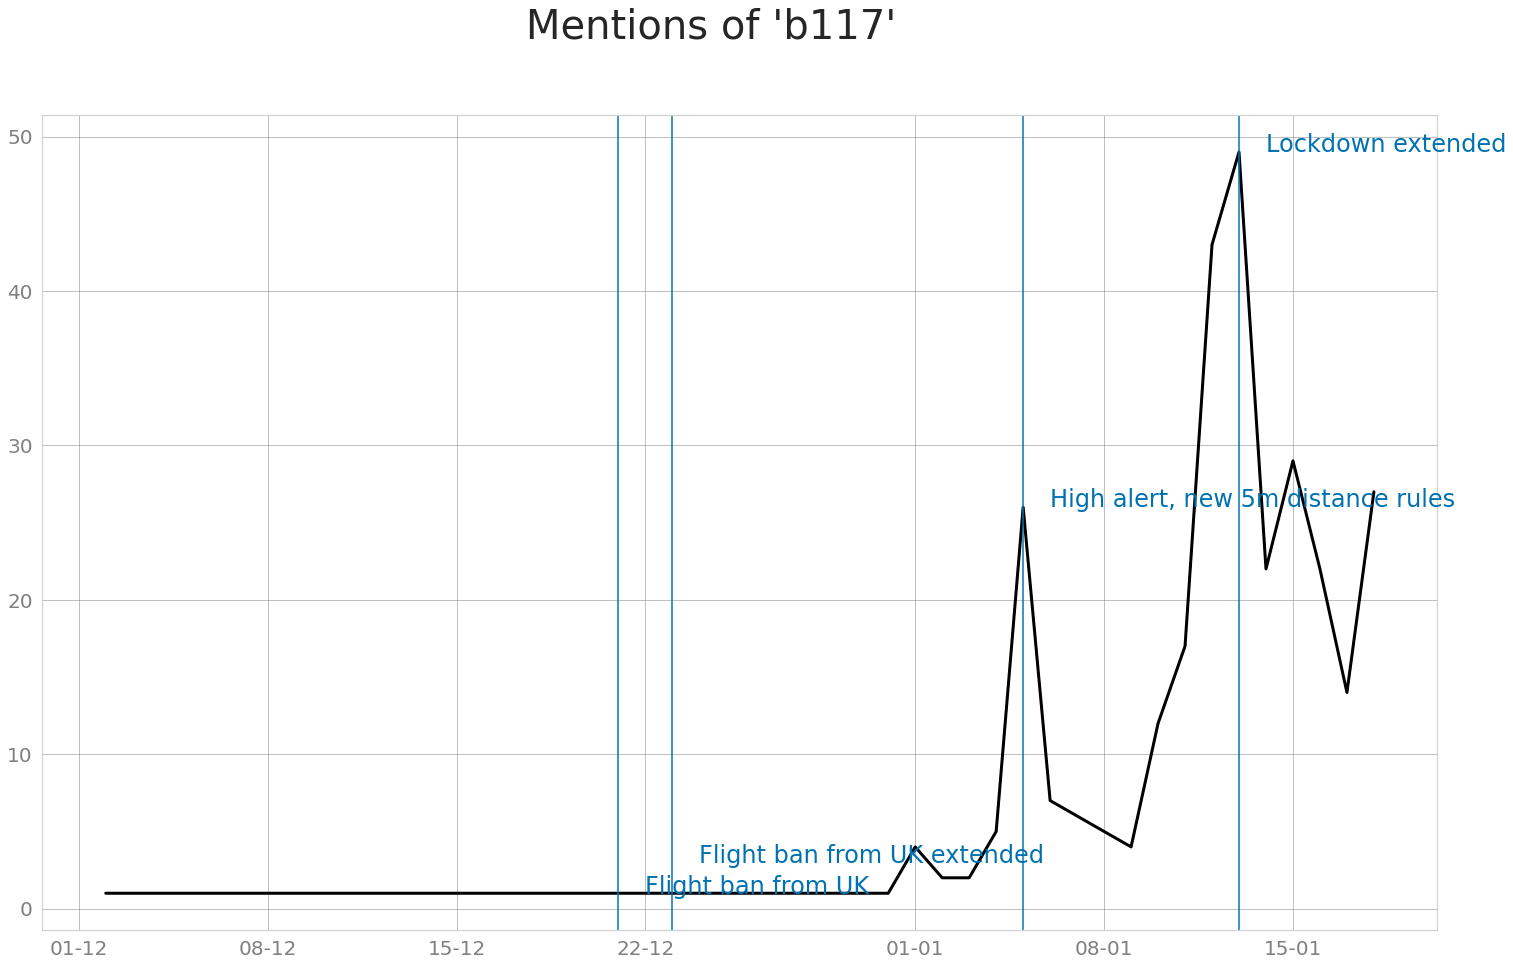

In [102]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_colors)

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets_y", 
                  palette = palette, 
                     linewidth = 3, data = freq_b117)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]


plt.axvline(dt.datetime(2020, 12, 21), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 22), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_b117[freq_b117["date"] == "2020-12-21"]["nr_of_tweets_y"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK', # data label
 color = palette[5])

plt.axvline(dt.datetime(2020, 12, 23), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 24), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 3, #freq_b117[freq_b117["date"] == "2020-12-23"]["nr_of_tweets_y"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK extended', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 5), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 6), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_b117[freq_b117["date"] == "2021-01-05"]["nr_of_tweets_y"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'High alert, new 5m distance rules', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 13), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 14), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = freq_b117[freq_b117["date"] == "2021-01-13"]["nr_of_tweets_y"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Lockdown extended', # data label
 color = palette[5])

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

fig.suptitle("Mentions of 'b117' ", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/mentions_of_b117.png"
fig.savefig(plot_name)

fig.show()

# Hashtags used in this data

In [103]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df

hashtags = hashtag_per_row(freq_df)

In [104]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()
    return tweet_freq

In [105]:
freq_hashtags = get_hashtag_frequencies(hashtags)
df = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)

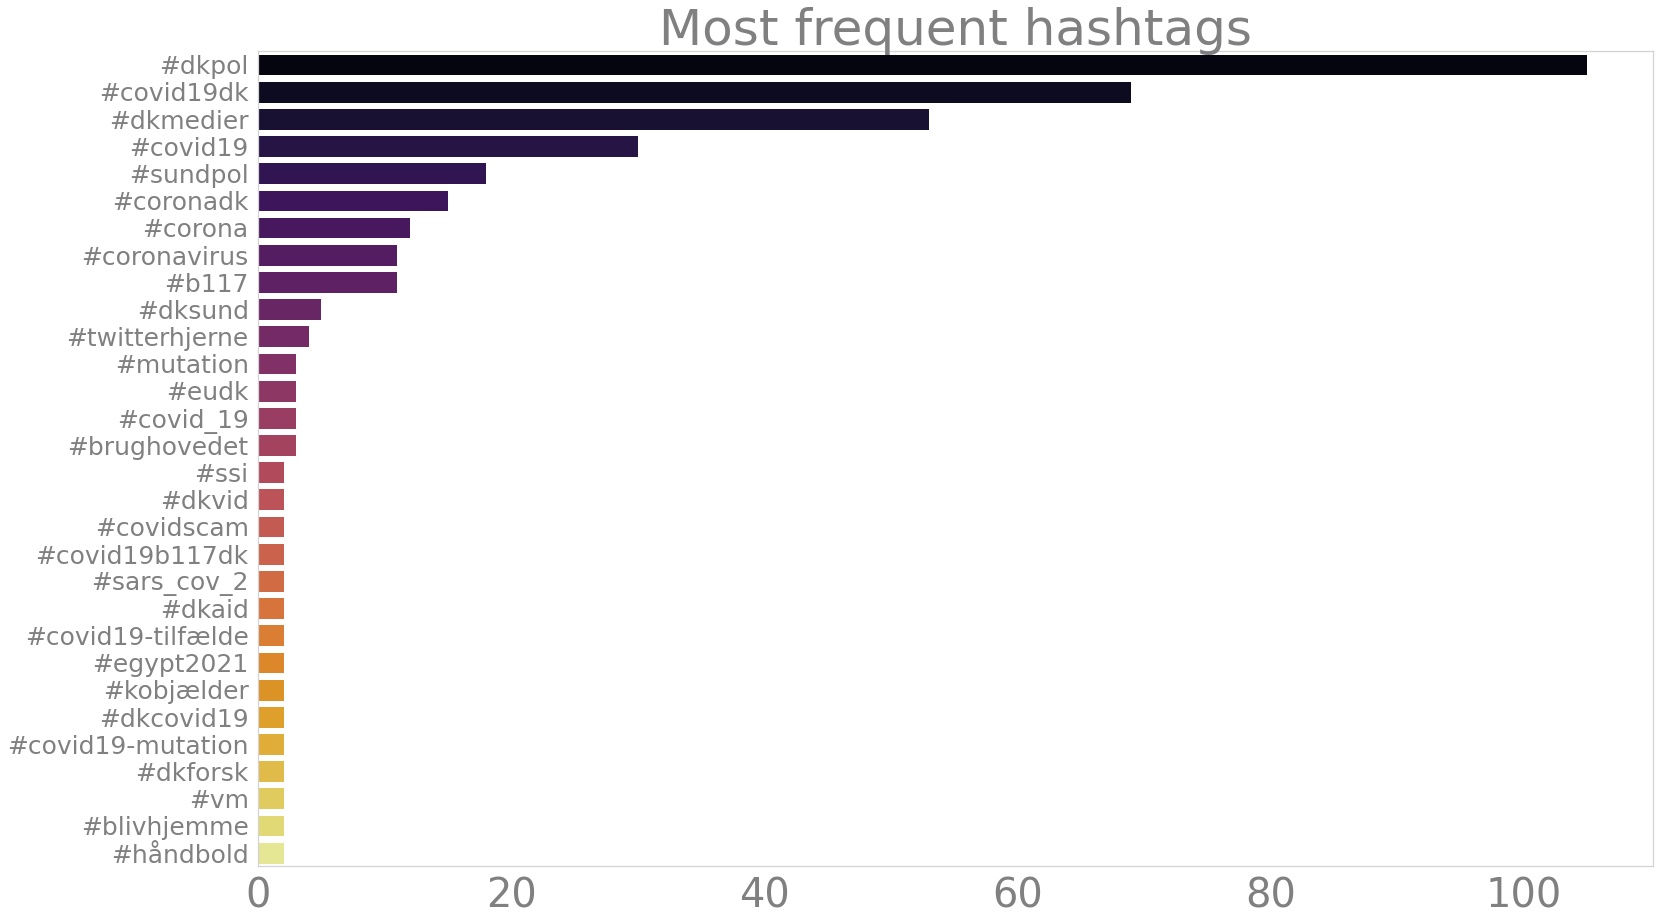

In [106]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

df0 = df.nlargest(30, columns=['nr_of_hashtags'])
nr_hash = len(df0["hashtag"].unique())
themes.theme_minimal(grid=False, ticks=False, fontsize=40)

a4_dims = (25,15) #(11.7, 8.27)
fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

palette = sns.color_palette("inferno", nr_hash)

ax = sns.barplot(y="hashtag", x="nr_of_hashtags", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent hashtags",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

ax.grid(color='white', linestyle='-', linewidth=0.5, which= "both")

plot_name = "fig/frequent_hashtags.png"
fig.savefig(plot_name)

# Sentiment analysis

In [107]:
clean_df["date"] = pd.to_datetime(clean_df["date"])

# Rolling average
clean_df['compound_7day_ave'] = clean_df.compound.rolling(7).mean().shift(-3)

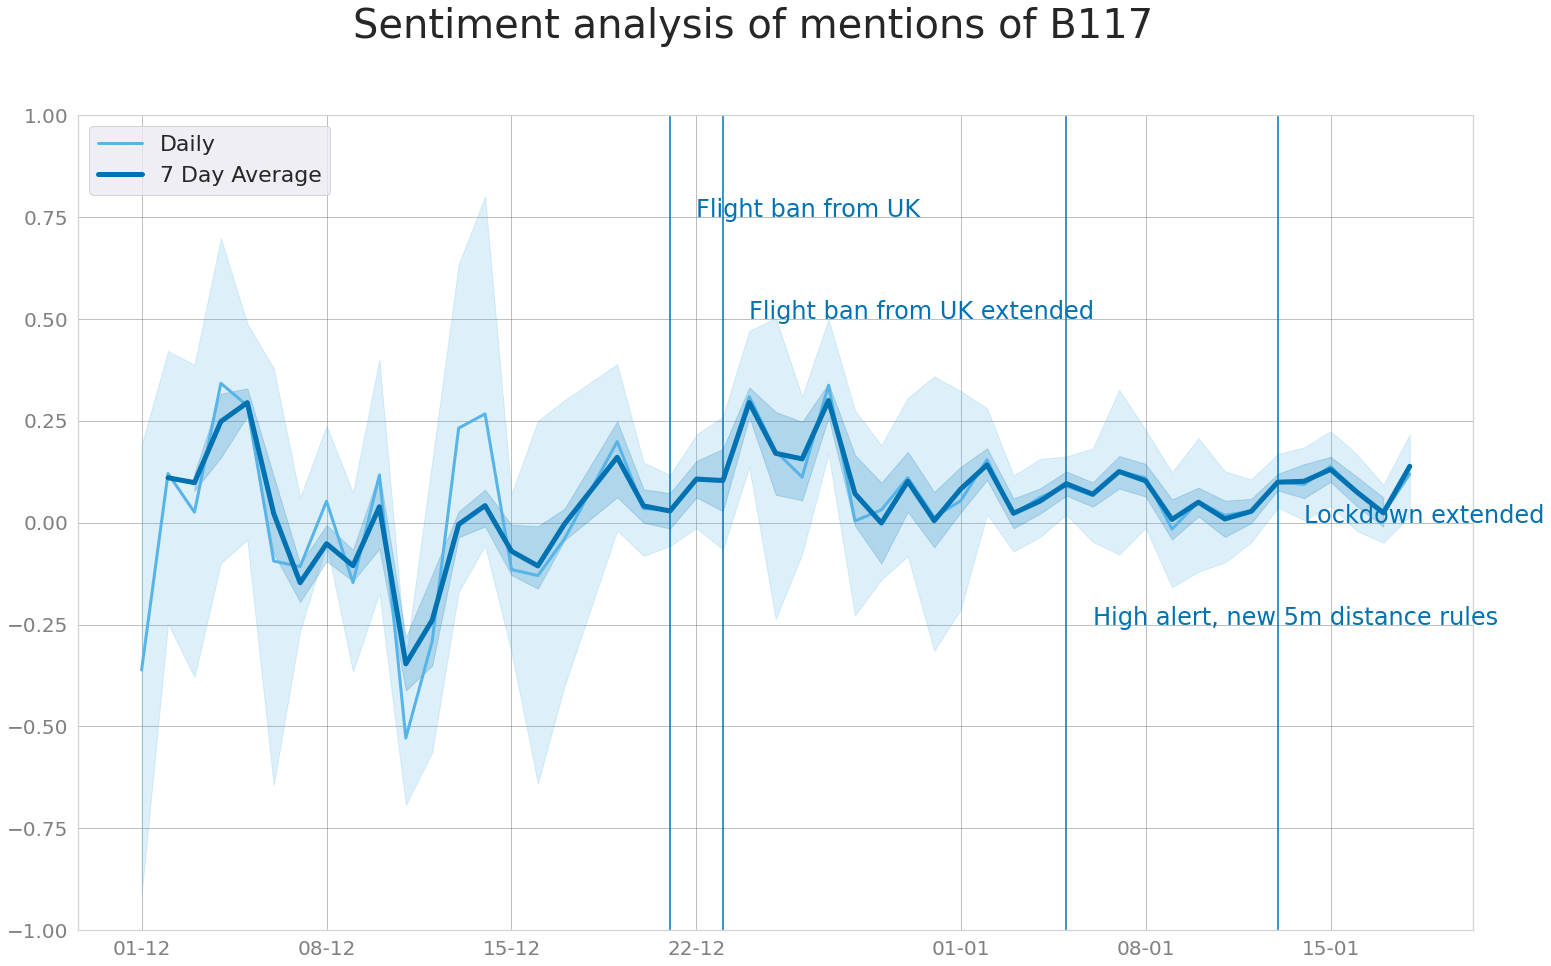

In [108]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="compound", 
                   label="Daily", color = palette[2],
                     linewidth = 3, data = clean_df)

ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
                   label="7 Day Average", color = palette[5],
                     linewidth = 5, data = clean_df)


plt.axvline(dt.datetime(2020, 12, 21), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 22), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 0.75,#clean_df[clean_df["date"] == "2020-12-21"]["compound_7day_ave"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK', # data label
 color = palette[5])

plt.axvline(dt.datetime(2020, 12, 23), color=palette[5])
plt.text(x = dt.datetime(2020, 12, 24), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 0.50,#clean_df[clean_df["date"] == "2020-12-23"]["compound_7day_ave"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Flight ban from UK extended', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 5), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 6), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = -0.25,#clean_df[clean_df["date"] == "2021-01-05"]["compound_7day_ave"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'High alert, new 5m distance rules', # data label
 color = palette[5])

plt.axvline(dt.datetime(2021, 1, 13), color=palette[5])
plt.text(x = dt.datetime(2021, 1, 14), # x-coordinate position of data label, adjusted to be 3 right of the data point
 y = 0,#clean_df[clean_df["date"] == "2021-01-13"]["compound_7day_ave"].reset_index(drop=True)[0], # y-coordinate position of data label, to take max height 
 s = 'Lockdown extended', # data label
 color = palette[5])

ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of B117", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/sentiment_compound.png"
fig.savefig(plot_name)

fig.show()

# Word Frequency

In [109]:
import spacy
import string
from string import digits
import nltk

sp = spacy.load('da_core_news_lg')

file = open("stop_words.txt","r+")
stop_words = file.read().split()

# Lemmatize stop words
#lemmas = []
#for word in stop_words:
##    sentence = sp(word)
#    lemmas.append(sentence.lemma_)
stops = " ".join(stop_words)
stops = sp(stops)
my_stop_words = [t.lemma_ for t in stops]

In [110]:
def lemmas(row):
    tweet = row["mentioneless_text"].lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #tweet = tweet.translate(str.maketrans('', '', digits))
    tweet = tweet.replace('”', '')
    tweet = tweet.replace('“', '')
    
    sentence = sp(tweet)
    
    lemmas = []
    for word in sentence:
        lemmas.append(word.lemma_)
    
    res = [x for x in lemmas if x not in my_stop_words]
    hmm = ['  ',' ','']
    res = [x for x in res if x not in hmm]
    return res

freq_df["tokens_list"] = freq_df.apply(lambda row: lemmas(row), axis = 1)

In [111]:
def join_tokens(row):
    res = " ".join(row["tokens_list"])
    return res

freq_df["tokens_string"] = freq_df.apply(lambda row: join_tokens(row), axis = 1)
texts = freq_df["tokens_string"]

In [112]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

In [113]:
wordlist = texts.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [114]:
word_freq = pd.DataFrame(data = list(zip(wordlist, wordfreq))).drop_duplicates().reset_index(drop = True).rename(columns={0:"word", 1:"Frequency"})

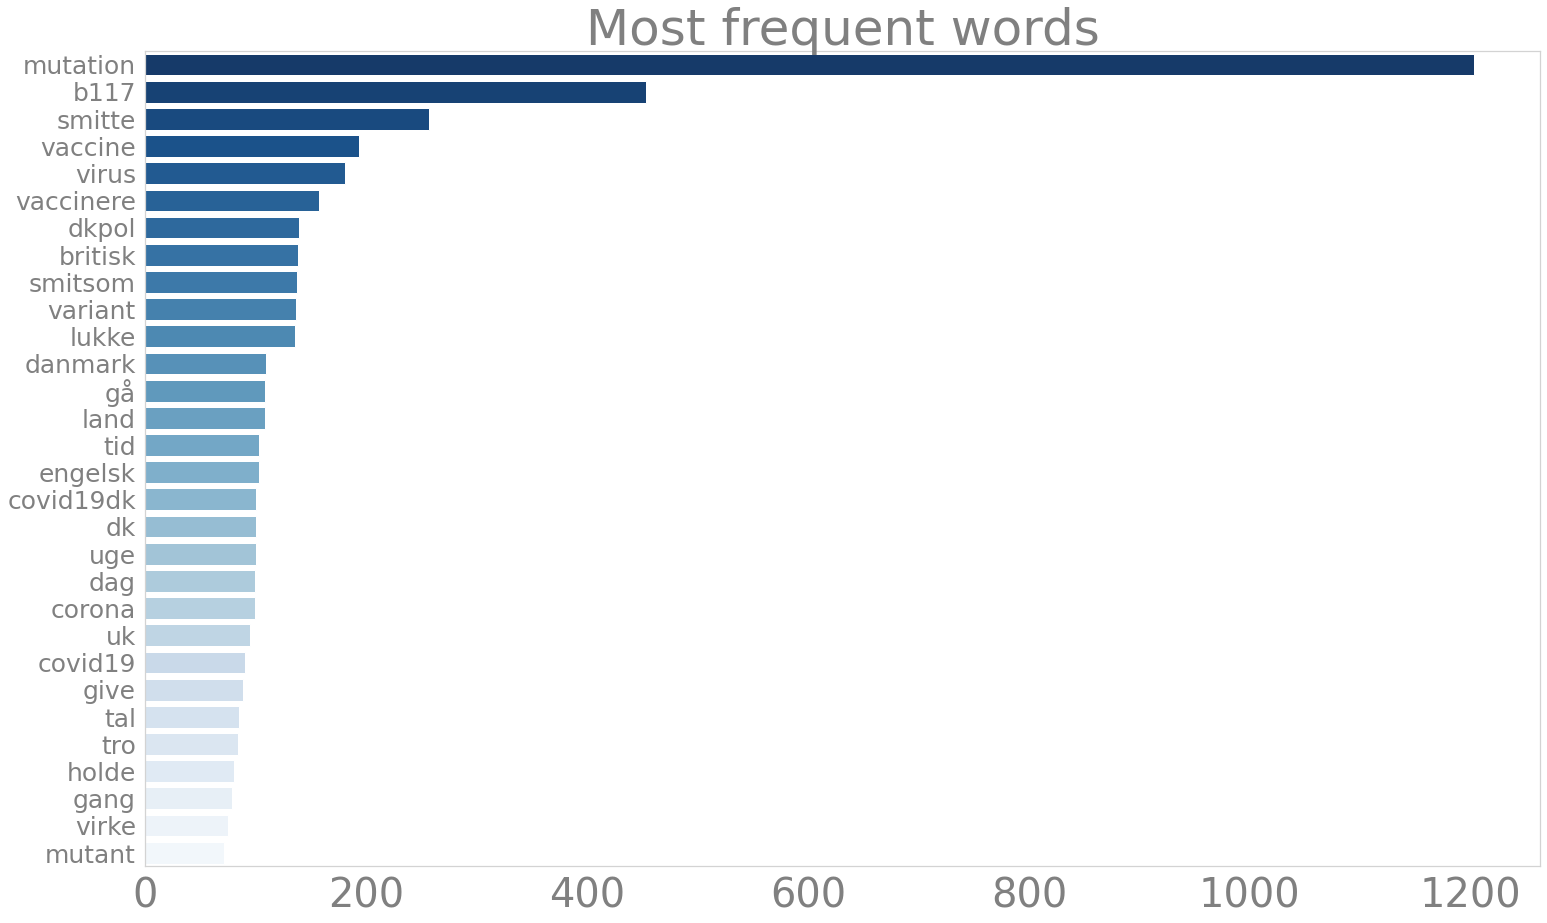

In [115]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

file = open("stop_words.txt","r+")
stop_words = file.read().split()

word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('xtick', labelsize=30)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

plot_name = "fig/word_frequency.png"
fig.savefig(plot_name)

# Word cloud

In [116]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plot_name = "fig/word_cloud.png"
    plt.savefig(plot_name)

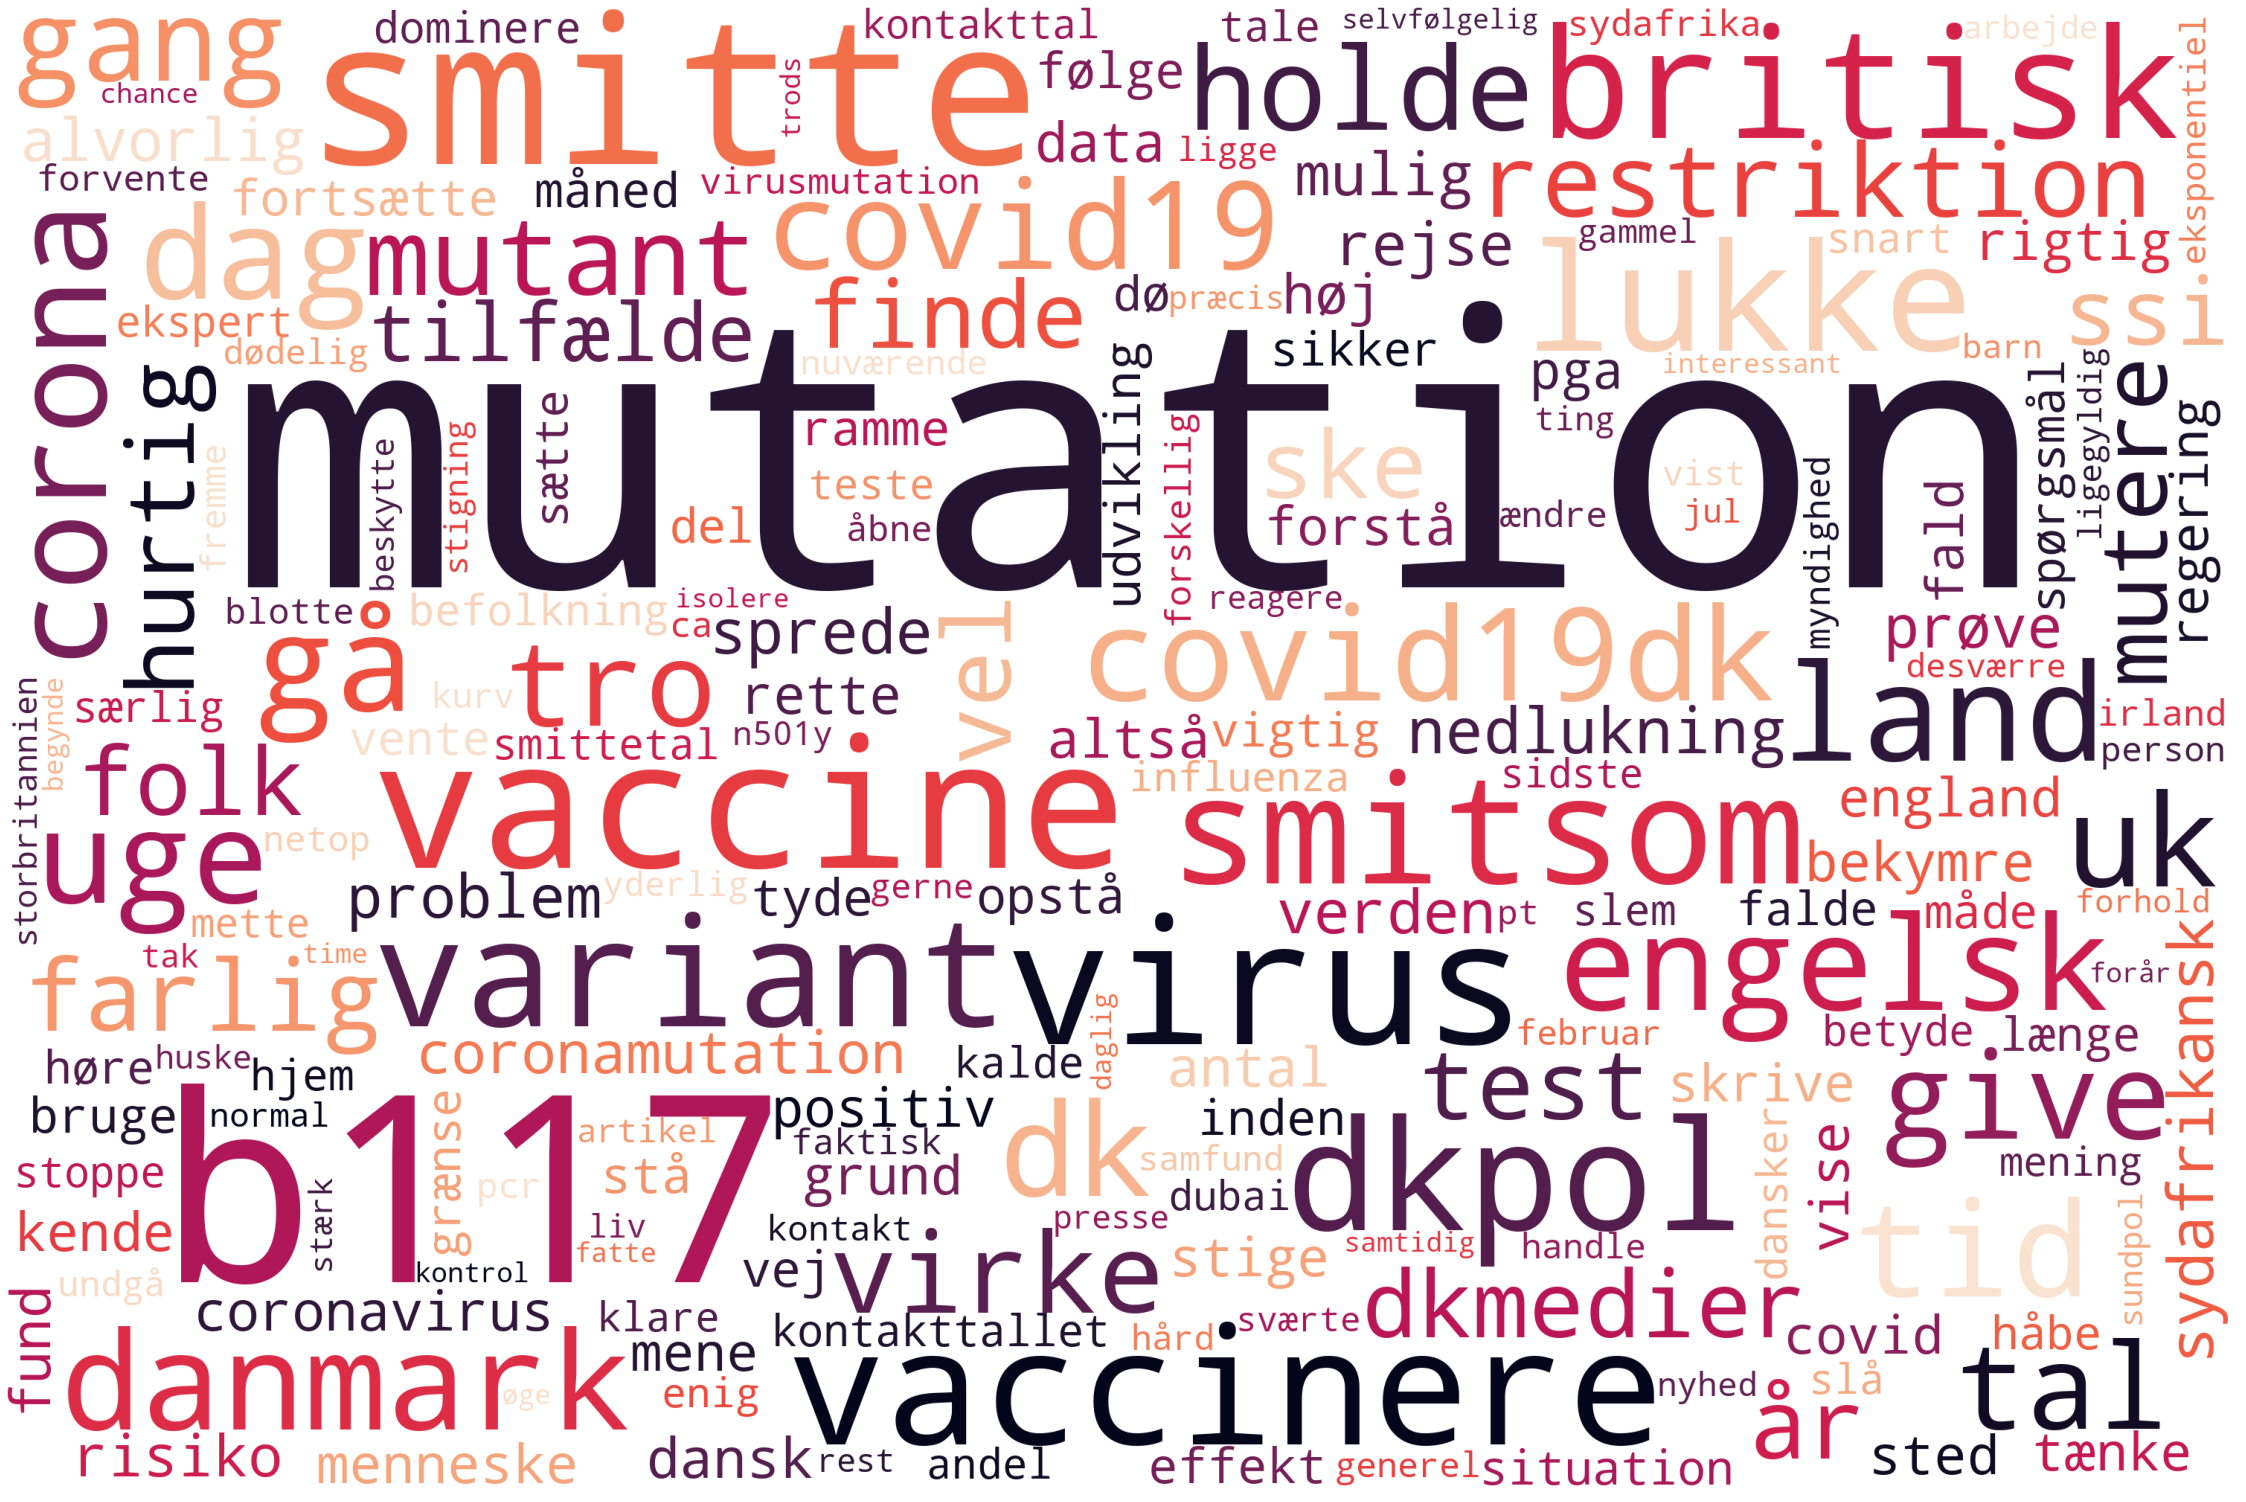

In [117]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap="rocket", 
                      collocations=False, stopwords = stop_words).generate(texts)
# Plot
plot_cloud(wordcloud)

# Co-occurrence

In [118]:
from nltk import bigrams
import itertools
import collections
import networkx as nx
import spacy
import nltk

In [119]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#nlp = spacy.load("da_core_news_sm")

%matplotlib inline

In [120]:
freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1781 non-null   int64         
 1   created_at         1781 non-null   object        
 2   id                 1781 non-null   float64       
 3   text               1781 non-null   object        
 4   b117               1781 non-null   object        
 5   wider              1781 non-null   object        
 6   neg                1781 non-null   float64       
 7   neu                1781 non-null   float64       
 8   pos                1781 non-null   float64       
 9   compound           1781 non-null   float64       
 10  date               1781 non-null   datetime64[ns]
 11  mentioneless_text  1781 non-null   object        
 12  text50             1781 non-null   object        
 13  dupe50             1781 non-null   bool          
 14  compound

In [121]:
print(freq_df["tokens_list"][0])

['mutation', 'desto', 'risiko', 'én', 'virkelig', 'oveni', 'mængde', 'mutation', 'læg', 'hastighed', 'hyppighed', 'hvormed', 'mutation', 'skab', 'forhold', 'forstå', 'finte', 'mene']


In [122]:
# Create list of lists containing bigrams in tweets
#terms_bigram = list(bigrams(wordlist))
terms_bigram = [list(bigrams(tweet)) for tweet in freq_df['tokens_list']]
#terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('mutation', 'desto'),
 ('desto', 'risiko'),
 ('risiko', 'én'),
 ('én', 'virkelig'),
 ('virkelig', 'oveni'),
 ('oveni', 'mængde'),
 ('mængde', 'mutation'),
 ('mutation', 'læg'),
 ('læg', 'hastighed'),
 ('hastighed', 'hyppighed'),
 ('hyppighed', 'hvormed'),
 ('hvormed', 'mutation'),
 ('mutation', 'skab'),
 ('skab', 'forhold'),
 ('forhold', 'forstå'),
 ('forstå', 'finte'),
 ('finte', 'mene')]

In [123]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [124]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=["bigram", "count"])

In [125]:
len(bigram_counts)

19037

In [126]:
bigram_df.head(10)

,bigram,count
0,"(britisk, mutation)",84
1,"(engelsk, mutation)",60
2,"(dkpol, dkmedier)",38
3,"(sydafrikansk, mutation)",30
4,"(virus, mutere)",21
5,"(vaccine, virke)",21
6,"(mutation, smitte)",20
7,"(smitsom, mutation)",20
8,"(mutation, vaccine)",19
9,"(virus, mutation)",17


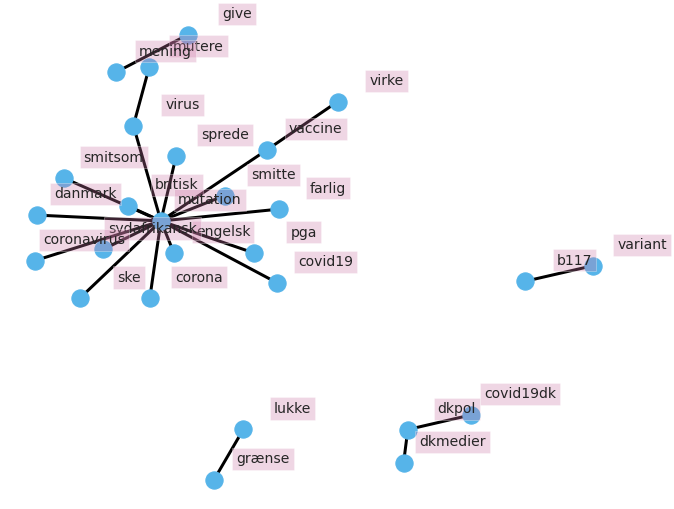

In [127]:
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color= palette[0], #'red',
                 node_color= palette[2], #'green',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor= palette[7], #'red', 
                      alpha=0.3), ## 0.5),
            horizontalalignment='center', fontsize=14)
    

fig.patch.set_visible(False)
ax.axis('off')

plt.savefig("fig/bigram_graph.png", dpi=150)

plt.show()